In [ ]:
# 1: Import necessary libraries
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
# 2: Load the dataset
data = pd.read_csv('/content/Admission_Predict.csv')

In [ ]:
# 3: Data Preprocessing

In [ ]:
print(data.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [ ]:
# Convert 'Chance of Admit ' column to binary classification (0 or 1)
data['Chance of Admit '] = [1 if each >= 0.75 else 0 for each in data['Chance of Admit ']]

In [ ]:
x = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = data['Chance of Admit ']

In [ ]:
# 4: Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
# 5: Train the Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# 6: Make predictions
y_predict = clf.predict(x_test)

In [ ]:
# 7: Evaluate the Model

In [ ]:
#  Accuracy Score
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy}')

Accuracy: 0.825


In [ ]:
# Confusion Matrix
matrix = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:')
print(matrix)


Confusion Matrix:
[[36  7]
 [ 7 30]]


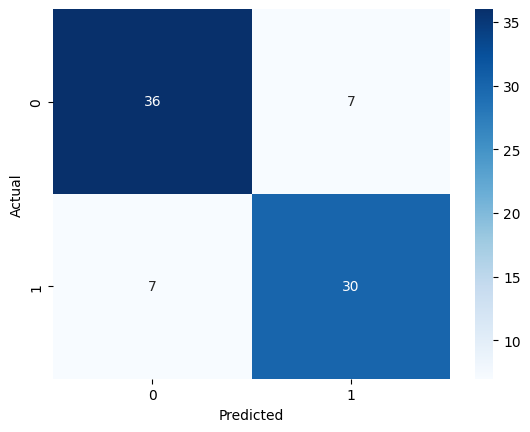

In [ ]:
# Visualize the confusion matrix
sb.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Classification Report
report = classification_report(y_test, y_predict)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        43
           1       0.81      0.81      0.81        37

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.82      0.82      0.82        80



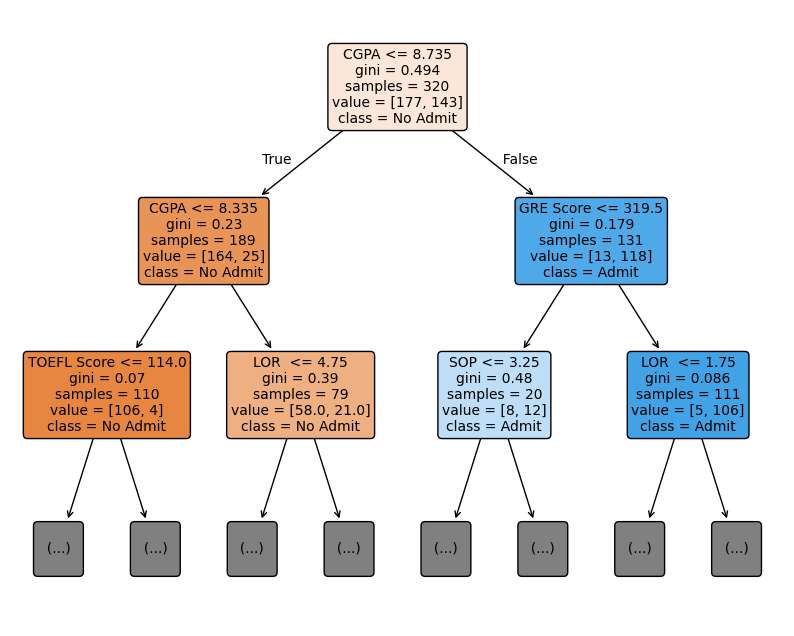

In [ ]:
# 8: Visualize the Decision Tree
plt.figure(figsize=(10,8))
plot_tree(clf, filled=True, feature_names=x.columns,max_depth=2, class_names=['No Admit', 'Admit'], rounded=True, fontsize=10)
plt.show()


In [ ]:
# 9: Making predictions for all students in the dataset
data['Predicted Admission Status'] = clf.predict(x)

# Convert predicted values to more readable format
data['Predicted Admission Status'] = data['Predicted Admission Status'].apply(lambda x: 'Admitted' if x == 1 else 'Not Admitted')

# 10: Display the results
print(data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Predicted Admission Status']])

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
395        324          110                  3  3.5   3.5  9.04         1   
396        325          107                  3  3.0   3.5  9.11         1   
397        330          116                  4  5.0   4.5  9.45         1   
398        312          103                  3  3.5   4.0  8.78         0   
399        333          117                  4  5.0   4.0  9.66         1   

    Predicted Admission Status  
0                     Admitted  
1        

In [ ]:
data.columns


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ',
       'Predicted Admission Status'],
      dtype='object')